#Introdução	à	Ciência	de	Dados - SME 0828

#Lista	de	exercícios	3
#Regressão Linear

##Nome: João Victor Sene Araújo
##NUSP: 11796382

In [ ]:
import numpy as np

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns # Biblioteca para mostrar os gráficos
sns.set()

###1 - Para os dados gerados pelo código abaixo, ajuste um modelo de regressão polinomial considerando um polinômio de grau 3 e 5. Qual oferece o melhor ajuste em termos do coeficiente R2?

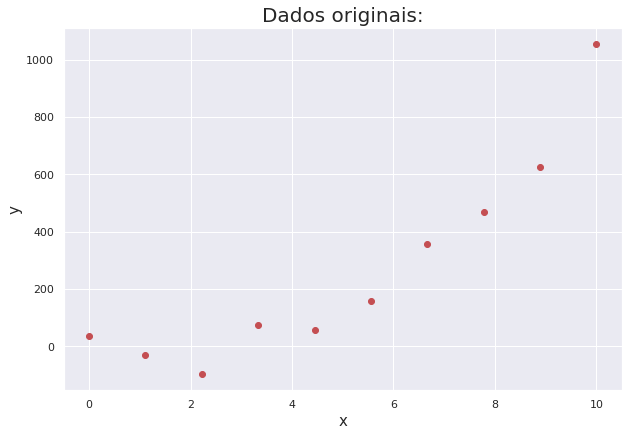

In [ ]:
N = 10
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)

plt.figure(figsize=(10, 20/3))
plt.plot(x,y, 'ro')
plt.title("Dados originais:",fontsize = 20)
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Grau: 3 
	R2: 0.9782280761360032
Grau: 5 
	R2: 0.9883904576121433


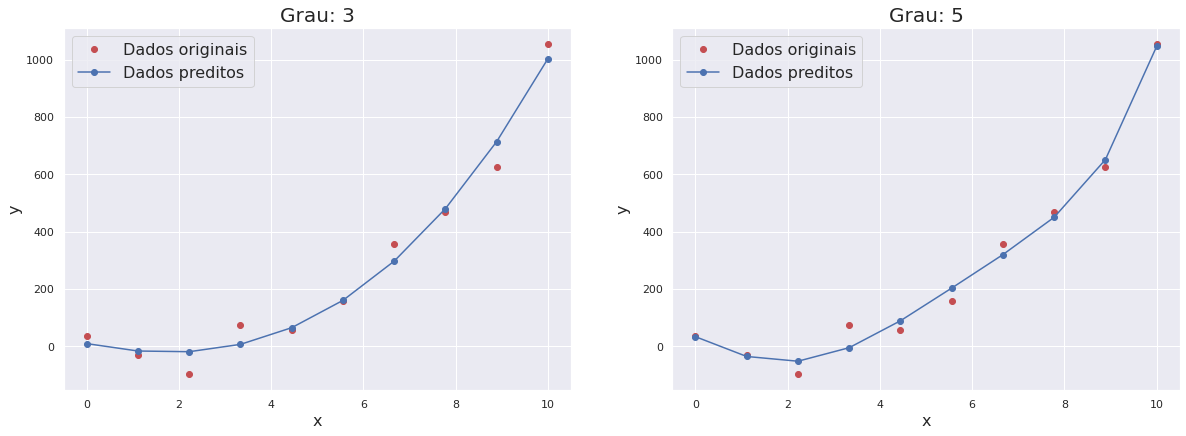

In [ ]:
degrees = [3,5]

fig, axes = plt.subplots(1, 2,figsize=(20,20/3))

i=0

for deg in degrees:

  # Define a transformação nos dados
  transformer = PolynomialFeatures(degree=deg, include_bias=False)
  x = x.reshape((-1, 1))
  transformer.fit(x)

  # Transforma os dados incluindo uma nova coluna com valores quadráticos
  x_ = transformer.transform(x)

  # Regressão Linear
  model = LinearRegression().fit(x_, y)
  y_pred = model.predict(x_)

  axes[i].set_title("Grau: "+str(deg),fontsize = 20)
  axes[i].plot(x,y, 'ro', label='Dados originais')
  axes[i].plot(x,y_pred, 'bo-', label = 'Dados preditos')
  axes[i].set_ylabel("y", fontsize=16)
  axes[i].set_xlabel("x", fontsize=16)
  axes[i].legend(loc=2, prop={'size': 16})

  R2 = r2_score(y, y_pred)
  print('Grau:',deg,'\n\tR2:', R2)

  i+=1

plt.show(True)

Em termos do coeficiente R2, a regressão sobre o polinômio de grau 5 apresentou uma melhor aproximação (uma vez que, quanto mais próximo do 1, melhor é a aproximação).

###2 - Ajuste um modelo e realize a inferência para a base de casas de Boston. Faça o diagnóstico e verifique se o modelo é adequado.

In [ ]:
data = pd.read_csv('data/BostonHousing.csv', header=(0))

data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Ajuste do modelo:

In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [ ]:
# Divide o conjunto em treinamento e teste
p = 0.3 # Fração e elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [ ]:
# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

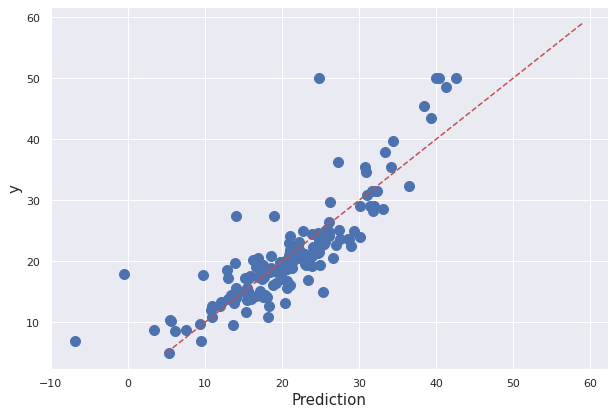

In [ ]:
fig = plt.figure(figsize=(10,20/3))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# Mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [ ]:
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7112260057484974


Inferência:

In [ ]:
data = pd.read_csv('data/BostonHousing.csv', header=(0))

formula = data.columns[-1] + " ~ "
formula += data.columns[0]

for i in data.columns[1:-1]:
  formula += " + " + i

# sumários estatístico com o OLS
model = ols(formula=formula, data = data).fit()

print(model.summary())
print('Parâmetros:\n', model.params)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          6.72e-135
Time:                        02:27:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Diagnóstico:

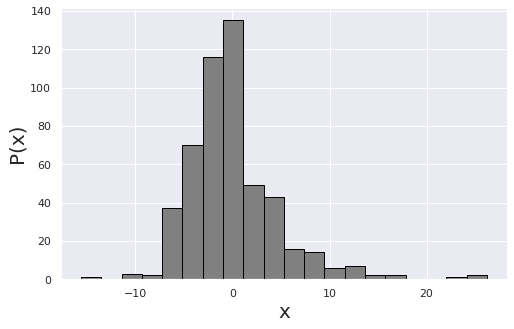

In [ ]:
plt.figure(figsize=(8,5))
residuals = model.resid

plt.hist(residuals, bins=20, color = 'gray', histtype='bar', ec='black')  
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.show(True)

###3 - Ajuste um modelo para a base de dados de propagandas (Advertising.csv) e faça a inferência. Todas as variáveis são importantes para o ajuste ou alguma delas pode ser descartada?

In [ ]:
data = pd.read_csv('data/Advertising.csv', header=(0))

data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
formula = data.columns[-1] + " ~ "
formula += data.columns[1]

for i in data.columns[2:-1]:
  formula += " + " + i

# sumários estatístico com o OLS
model = ols(formula=formula, data = data).fit()

print(model.summary())
print('Parâmetros:\n', model.params)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        02:27:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

É possível observar que o newspaper apresenta o menor coeficiente. Logo, iremos fazer a Regressão Linear com a coluna 'newspaper' e sem, a fim de comparar os dois modelos e verificar se a variável é realmente descartável.

In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape

In [ ]:
y = data[:,-1]
X = data[:,0:ncol-1]

# Divide o conjunto em treinamento e teste
p = 0.3 # Fração e elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

R2 = r2_score(y_test, y_pred)
print("Com a variável 'newspaper':")
print('R2:', R2)

Com a variável 'newspaper':
R2: 0.8609155416329135


In [ ]:
y = data[:,-1]
X = data[:,0:ncol-2]

# Divide o conjunto em treinamento e teste
p = 0.3 # Fração e elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

R2 = r2_score(y_test, y_pred)
print("Sem a variável 'newspaper':")
print('R2:', R2)

Sem a variável 'newspaper':
R2: 0.8656393496294277


Como podemos ver, o R2 não se altera muito, o que mostra que a variável pode ser, de certa forma, descartável.